In [187]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import random


In [196]:
DATA_DIR = 'merged_resized_pngs_splited/train'
OUTPUT_DIR = 'merged_resized_pngs_splited_augmented/train'

SUBSET_DATA_DIR = 'subset_merged_resized_pngs_splited/train'

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomAdjustSharpness(sharpness_factor=2),  # More intense sharpness
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Softer color changes
    transforms.RandomAffine(degrees=0, scale=(1, 1.25)),  # Combining rotation, translation, and zoom
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 5)),  # Less intense blur
])

In [194]:
augmented_dataset = ImageFolder(DATA_DIR, transform=augment_transform)
augmented_loader = DataLoader(augmented_dataset, batch_size=32, shuffle=False)

normal_dataset = ImageFolder(DATA_DIR, transform=transforms.ToTensor())
normal_loader = DataLoader(normal_dataset, batch_size=32, shuffle=False)

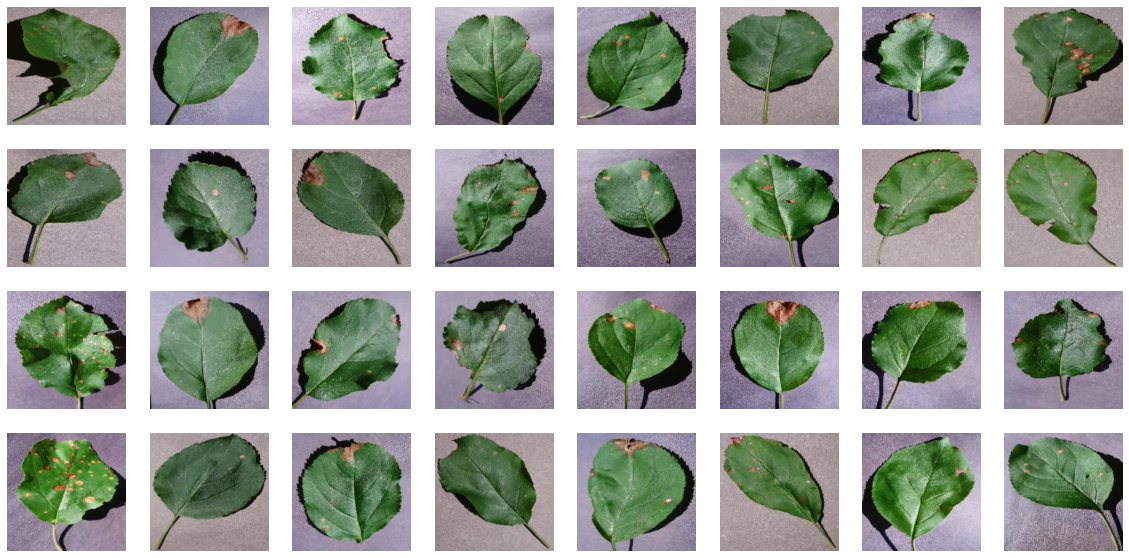

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

In [195]:
for images, labels in normal_loader:
    fig, axes = plt.subplots(4, 8, figsize=(20, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].permute(1, 2, 0))
        ax.axis('off')
    plt.show()

    break

for images, labels in augmented_loader:
    fig, axes = plt.subplots(4, 8, figsize=(20, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].permute(1, 2, 0))
        ax.axis('off')
    plt.show()

    break

In [199]:
DATA_DIR = 'merged_resized_pngs_splited/train'
OUTPUT_DIR = 'merged_resized_pngs_splited_augmented/train'

# open datadir and count the number of files in each folder save in a dct and print
class_counts = {}
for folder in os.listdir(DATA_DIR):
    class_counts[folder] = len(os.listdir(os.path.join(DATA_DIR, folder)))

class_counts

{'Apple__black_rot': 501,
 'Apple__healthy': 1929,
 'Apple__rust': 924,
 'Apple__scab': 1170,
 'Cherry__healthy': 724,
 'Cherry__powdery_mildew': 841,
 'Corn__common_rust': 1046,
 'Corn__gray_leaf_spot': 1864,
 'Corn__healthy': 1092,
 'Corn__northern_leaf_blight': 1770,
 'Corn__streak_virus': 772,
 'Cucumber__diseased': 280,
 'Cucumber__healthy': 272,
 'Grape__black_measles': 1111,
 'Grape__black_rot': 9218,
 'Grape__healthy': 552,
 'Grape__leaf_blight_(isariopsis_leaf_spot)': 716,
 'Peach__bacterial_spot': 1842,
 'Peach__healthy': 780,
 'Pepper_bell__bacterial_spot': 1060,
 'Pepper_bell__healthy': 1488,
 'Potato__early_blight': 1142,
 'Potato__healthy': 126,
 'Potato__late_blight': 1072,
 'Rice__brown_spot': 522,
 'Rice__healthy': 1190,
 'Rice__hispa': 452,
 'Rice__leaf_blast': 784,
 'Rice__neck_blast': 800,
 'Soybean__bacterial_blight': 44,
 'Soybean__caterpillar': 2647,
 'Soybean__diabrotica_speciosa': 1764,
 'Soybean__downy_mildew': 40,
 'Soybean__healthy': 5011,
 'Soybean__powdery

In [200]:
import pandas as pd

df = pd.DataFrame(class_counts.items(), columns=['class', 'count'])
df['augment_ratio'] = 2000 / df['count']
df['augment_ratio'] = df['augment_ratio'].apply(lambda x: round(max(min(x, 10), 1.2), 1))
df['augment_count'] = (df['augment_ratio'] * df['count']).astype(int)
df

,class,count,augment_ratio,augment_count
0,Apple__black_rot,501,4.0,2004
1,Apple__healthy,1929,1.2,2314
2,Apple__rust,924,2.2,2032
3,Apple__scab,1170,1.7,1989
4,Cherry__healthy,724,2.8,2027
...,...,...,...,...
59,Tomato__yellow_leaf_curl_virus,3230,1.2,3876
60,Wheat__brown_rust,732,2.7,1976
61,Wheat__healthy,980,2.0,1960
62,Wheat__septoria,77,10.0,770


In [201]:
DATA_DIR = 'merged_resized_pngs_splited/train'
OUTPUT_DIR = 'merged_resized_pngs_splited_augmented/train'

for index, row in df.iterrows():
    class_dir = os.path.join(DATA_DIR, row['class'])
    augment_dir = os.path.join(OUTPUT_DIR, row['class'])
    augment_ratio = row['augment_ratio']

    if not os.path.exists(augment_dir):
        os.makedirs(augment_dir)
    
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path)
        for i in range(1, int(augment_ratio)):
            augment_image = augment_transform(image)
            augment_image.save(os.path.join(augment_dir, f'{image_name[:-4]}_{i}.png'))
        # if random.random() is less than decimal part of augment_ratio
        if random.random() < augment_ratio % 1:
            augment_image = augment_transform(image)
            augment_image.save(os.path.join(augment_dir, f'{image_name[:-4]}_{i+1}.png'))
        
        # save original image
        image.save(os.path.join(augment_dir, f'{image_name}'))